In [1]:
from mindquantum.utils import random_circuit
from mindquantum.core.circuit import Circuit
from huawei_graph_tool import ConvertCircuit,my_random_circuit,CustomGraphDataset
import random,os
import networkx as nx
import numpy as np
from torch_geometric.utils import train_test_split_edges
from torch_geometric.data import Data
from mindquantum.io.qasm import HiQASM
from mindquantum.core import gates
from mindquantum.algorithm.compiler import  DAGCircuit,DAGQubitNode,DAGNode
from mindquantum.core.parameterresolver import PRGenerator
from mindquantum.core.gates import RX,RY,RZ,CNOT

/opt/miniconda3/envs/MindSpore/lib/python3.9/site-packages/mindquantum/simulator/__init__.py:17: UserWarning: Unable import mqvector gpu backend due to: cannot import name '_mq_vector_gpu' from partially initialized module 'mindquantum' (most likely due to a circular import) (/opt/miniconda3/envs/MindSpore/lib/python3.9/site-packages/mindquantum/__init__.py)
  from .available_simulator import SUPPORTED_SIMULATOR


In [2]:
# 固定随机数种子
#random.seed(42)

#random_gate_num = random.randint(10, 35)
random_gate_num = 40
random_seed = random.randint(0, 5000)
sd_rate = random.uniform(0.3, 0.8)
ctrl_rate = random.uniform(0.1, 0.2)
print(sd_rate,random_gate_num,sd_rate,ctrl_rate,random_seed)
cir1 = my_random_circuit(n_qubits=8,gate_num=random_gate_num,sd_rate=sd_rate,ctrl_rate=ctrl_rate,seed=random_seed)
X,A,G,P,Gate_name =  ConvertCircuit(circuit=cir1)
print(X.shape,A.shape)

0.5745145544163734 40 0.5745145544163734 0.13135917973304878 3115
(42, 22) (42, 42)


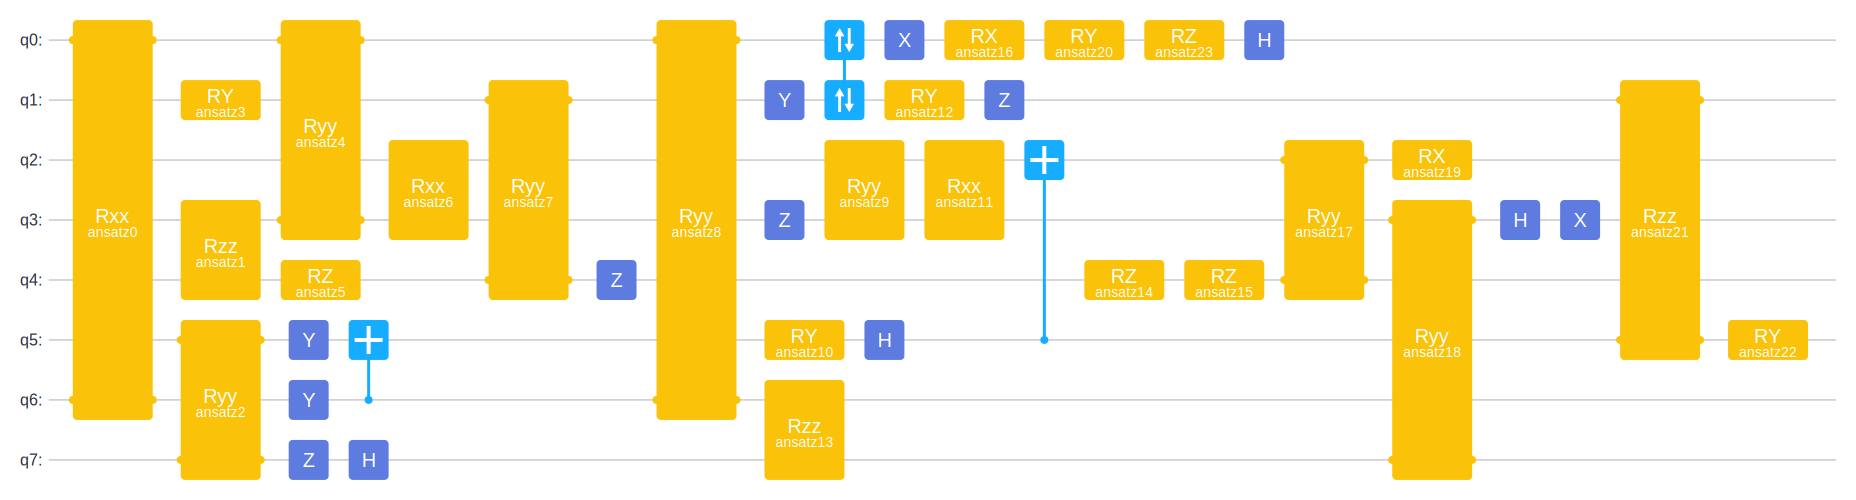

In [4]:
cir1.svg()

In [3]:
cir = my_random_circuit(n_qubits=8,gate_num=10,sd_rate=sd_rate,ctrl_rate=ctrl_rate,seed=random_seed)

In [5]:
2**16

65536

In [ ]:
ConvertCircuit(cir)

In [3]:
import numpy as np
HIQASM = HiQASM()
for i in range(6000):
    #random_gate_num = random.randint(10, 30)
    random_gate_num = 40
    random_seed = random.randint(0, 6000)
    sd_rate = random.uniform(0.3, 0.8)
    ctrl_rate = random.uniform(0.1, 0.2)
    #print(sd_rate,random_gate_num)
    cir = my_random_circuit(n_qubits=8,gate_num=random_gate_num,sd_rate=sd_rate,ctrl_rate=ctrl_rate,seed=random_seed)
    X,A,G,P,Gate_name =  ConvertCircuit(circuit=cir)
    print(f'seed={random_seed}')
    np.savetxt(f'./VGAE_dataset/raw/X/X_{i}.csv', X, delimiter=',', fmt='%d')
    np.savetxt(f'./VGAE_dataset/raw/A/A_{i}.csv', A, delimiter=',', fmt='%d')
    
    cir_unbound = cir.apply_value(dict(zip(cir.params_name, np.random.uniform(0, 2*np.pi, len(cir.params_name)))))
    print(A.shape,X.shape)
    #circuit_str = HIQASM.to_file(f'./VGAE_dataset/cir_img/cir{i}.hiqasm', cir_unbound, version='0.2')


seed=4348
(42, 42) (42, 22)
seed=3254
(42, 42) (42, 22)
seed=4724
(42, 42) (42, 22)
seed=5272
(42, 42) (42, 22)
seed=5726
(42, 42) (42, 22)
seed=5065
(42, 42) (42, 22)
seed=5577
(42, 42) (42, 22)
seed=5151
(42, 42) (42, 22)
seed=3981
(42, 42) (42, 22)
seed=2862
(42, 42) (42, 22)
seed=3219
(42, 42) (42, 22)
seed=1450
(42, 42) (42, 22)
seed=374
(42, 42) (42, 22)
seed=5660
(42, 42) (42, 22)
seed=2292
(42, 42) (42, 22)
seed=3807
(42, 42) (42, 22)
seed=5777
(42, 42) (42, 22)
seed=2362
(42, 42) (42, 22)
seed=5064
(42, 42) (42, 22)
seed=5838
(42, 42) (42, 22)
seed=5406
(42, 42) (42, 22)
seed=5153
(42, 42) (42, 22)
seed=5535
(42, 42) (42, 22)
seed=3049
(42, 42) (42, 22)
seed=1326
(42, 42) (42, 22)
seed=4604
(42, 42) (42, 22)
seed=1597
(42, 42) (42, 22)
seed=5611
(42, 42) (42, 22)
seed=4222
(42, 42) (42, 22)
seed=4190
(42, 42) (42, 22)
seed=835
(42, 42) (42, 22)
seed=1883
(42, 42) (42, 22)
seed=2924
(42, 42) (42, 22)
seed=2337
(42, 42) (42, 22)
seed=5176
(42, 42) (42, 22)
seed=2999
(42, 42) (42

In [ ]:
X.shape

In [ ]:
Gate_Categary = ['START','X','Y','H','Z','RX','RY','RZ','Rxx','Ryy','Rzz','SWAP','CNOT','END']
cir = Circuit()
row,col = X.shape
pg = PRGenerator(name='ansatz')
for i in range(row):
    row = X[i]
    node_index=row[:-8]
    qbits_index=row[-8:]
    if all(x == 0 for x in node_index):
        continue
    print(node_index)
    gate_str = Gate_Categary[np.where(node_index == 1)[0][0]]
    qbits = np.where(qbits_index == 1)[0]
    qbits = [int(qbit) for qbit in qbits]  # 将 numpy.int64 转换为 Python int
    print(gate_str,qbits)
    print(f'Gate ={gate_str}')

    if gate_str == 'START' or gate_str == 'END':
        continue
    if gate_str == 'X':
        if len(qbits)==1:
            cir +=gates.X.on(qbits[0])
        else:
            cir +=gates.X.on(qbits[0],qbits[1])
    if gate_str == 'Y':
        if len(qbits)==1:
            cir +=gates.Y.on(qbits[0])
        else:
            cir +=gates.Y.on(qbits[0],qbits[1])
            
    if gate_str == 'Z':
        if len(qbits)==1:
            cir +=gates.Z.on(qbits[0])
        else:
            cir +=gates.Z.on(qbits[0],qbits[1])
    
    if gate_str == 'H':
        if len(qbits)==1:
            cir +=gates.H.on(qbits[0])
        else:
            cir +=gates.H.on(qbits[0],qbits[1])
            
    if gate_str == 'RX':
        print('检测到 RX!')
        cir +=RX(pg.new()).on(qbits[0])
    if gate_str == 'RY':
        cir +=RY(pg.new()).on(qbits[0])
    if gate_str == 'RZ':
        cir +=RZ(pg.new()).on(qbits[0])
    if gate_str == 'CNOT':
        cir +=CNOT.on(qbits[0],qbits[1])
    if gate_str == 'SWAP':
        print(qbits[0],qbits[1])
        cir +=gates.SWAP.on(qbits)
    if gate_str == 'Rxx':
        cir +=gates.Rxx(pg.new()).on(qbits)
    if gate_str == 'Ryy':
        cir +=gates.Ryy(pg.new()).on(qbits)
    if gate_str == 'Rzz':
        cir +=gates.Rzz(pg.new()).on(qbits)

In [ ]:
cir.summary()
cir.svg()

In [ ]:
cir1.svg()

In [ ]:
cir1.summary()

In [73]:
pr = np.random.random(18)
pr = [1.2]*18
cir_my = cir.apply_value(dict(zip(cir.params_name, pr)))
cir_auto = cir1.apply_value(dict(zip(cir.params_name, pr)))


In [ ]:
cir_auto

In [ ]:
from mindquantum.simulator import Simulator

sim = Simulator('mqvector',8)
sim.reset()
sim.apply_circuit(cir_my)
sim.get_qs()

In [ ]:
sim.reset()
sim.apply_circuit(cir_auto)
sim.get_qs()